In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import platform
import keras
from keras import models 
from keras import layers
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

print("python version       :" + platform.python_version())
print("keras version        :" + keras.__version__)
print("tensorflow version   :" + tf.__version__)

python version       :3.8.5
keras version        :2.4.3
tensorflow version   :2.2.0


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape
train_data.ndim

train_labels.shape
train_labels.ndim

#train_data[0]
train_labels[0]

max([max(sequence1) for sequence1 in train_data])


(25000,)

1

(25000,)

1

1

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [5]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

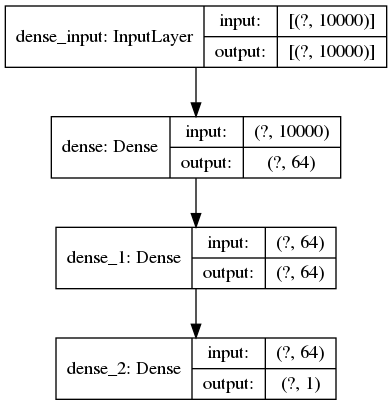

&lt;matplotlib.image.AxesImage at 0x7f3ff76b3160&gt;

&lt;matplotlib.image.AxesImage at 0x7f3ff77e26d0&gt;

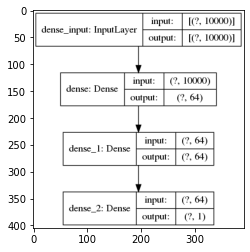

In [6]:


model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

plot_model(model, to_file='models1.png', show_shapes=True, show_layer_names=True)
plt.imshow(mpimg.imread("models.png"))
plt.imshow(mpimg.imread("models1.png"))

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

history = model.fit(x_train,y_train,epochs=10, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/10
49/49 [==============================] - 1s 15ms/step - loss: 0.4123 - accuracy: 0.8266 - val_loss: 0.3095 - val_accuracy: 0.8688
Epoch 2/10
49/49 [==============================] - 1s 13ms/step - loss: 0.2358 - accuracy: 0.9097 - val_loss: 0.1526 - val_accuracy: 0.9497
Epoch 3/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1880 - accuracy: 0.9288 - val_loss: 0.1370 - val_accuracy: 0.9523
Epoch 4/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1490 - accuracy: 0.9452 - val_loss: 0.1214 - val_accuracy: 0.9568
Epoch 5/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1217 - accuracy: 0.9551 - val_loss: 0.0758 - val_accuracy: 0.9798
Epoch 6/10
49/49 [==============================] - 1s 14ms/step - loss: 0.0976 - accuracy: 0.9655 - val_loss: 0.0569 - val_accuracy: 0.9837
Epoch 7/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0794 - accuracy: 0.9714 - val_loss: 0.0933 - val_accuracy: 0.9627
Epoch 8/10
49

dict_keys([&#39;loss&#39;, &#39;accuracy&#39;, &#39;val_loss&#39;, &#39;val_accuracy&#39;])

[&lt;matplotlib.lines.Line2D at 0x7f3ffbfa0fd0&gt;]

[&lt;matplotlib.lines.Line2D at 0x7f3ffbfac460&gt;]

Text(0.5, 1.0, &#39;Training and validation loss&#39;)

Text(0.5, 0, &#39;Epochs&#39;)

Text(0, 0.5, &#39;Loss&#39;)

&lt;matplotlib.legend.Legend at 0x7f3ffbfa0e20&gt;

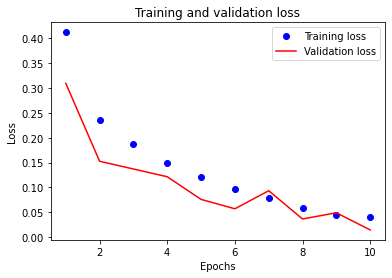

In [8]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')   #←------'bo'表示蓝色圆点
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')   #←------'b'表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[&lt;matplotlib.lines.Line2D at 0x7f3ffc021160&gt;]

[&lt;matplotlib.lines.Line2D at 0x7f3ffc021cd0&gt;]

Text(0.5, 1.0, &#39;Training and validation accuracy&#39;)

Text(0.5, 0, &#39;Epochs&#39;)

Text(0, 0.5, &#39;Accuracy&#39;)

&lt;matplotlib.legend.Legend at 0x7f3ffc021700&gt;

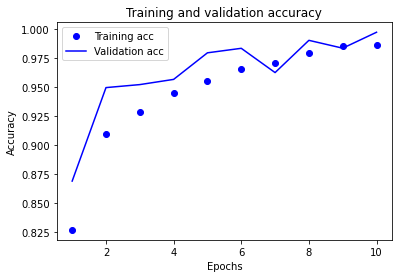

In [9]:
plt.clf()   #←------ 清空图像
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.8629
[0.541631817817688, 0.8629199862480164]


In [11]:
model.predict(x_test)

array([[0.0393623 ],
       [1.        ],
       [0.9875731 ],
       ...,
       [0.07151395],
       [0.01934524],
       [0.829311  ]], dtype=float32)